# Importando Bibliotecas

In [43]:
# pip install pandas scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Abrindo arquivo com os dados de acidentes

In [65]:
# Carregar o dataset
df = pd.read_csv("D:/FaculdadeCoisas/7 Semestre/Topicos Avancados em Computacao IV/Crash_Data.csv", sep=',', low_memory=False)

# Remover colunas desnecessárias 
df = df[[ 'Dayweek', 'Age Group']]

# Tratar valores ausentes
df.dropna(inplace=True)

# Converter variáveis categóricas em variáveis numéricas
df2 = pd.get_dummies(df, columns=[ 'Dayweek','Age Group'])

print(df2)

       Dayweek_Friday  Dayweek_Monday  Dayweek_Saturday  Dayweek_Sunday  \
0               False           False             False            True   
1               False           False              True           False   
2               False           False              True           False   
3               False           False              True           False   
4               False           False              True           False   
...               ...             ...               ...             ...   
52838           False           False             False           False   
52839           False            True             False           False   
52840           False            True             False           False   
52841           False            True             False           False   
52842           False           False             False           False   

       Dayweek_Thursday  Dayweek_Tuesday  Dayweek_Wednesday  \
0                 False            F

       Dayweek_Friday  Dayweek_Monday
0               False           False
1               False           False
2               False           False
3               False           False
4               False           False
...               ...             ...
52838           False           False
52839           False            True
52840           False            True
52841           False            True
52842           False           False

[52753 rows x 2 columns]
Accuracy: 0.9051560722861115
Classification Report:
              precision    recall  f1-score   support

       False       0.91      1.00      0.95     14325
        True       0.00      0.00      0.00      1501

    accuracy                           0.91     15826
   macro avg       0.45      0.50      0.48     15826
weighted avg       0.82      0.91      0.86     15826

Confusion Matrix:
[[14325     0]
 [ 1501     0]]


c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Pichau\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

[Text(0.6, 0.8333333333333334, 'Dayweek_Monday <= 0.5\ngini = 0.176\nsamples = 36927\nvalue = [33318, 3609]\nclass = Nao merreu'),
 Text(0.4, 0.5, 'Dayweek_Friday <= 0.5\ngini = 0.17\nsamples = 32695\nvalue = [29626, 3069]\nclass = Nao merreu'),
 Text(0.2, 0.16666666666666666, 'gini = 0.167\nsamples = 26636\nvalue = [24186, 2450]\nclass = Nao merreu'),
 Text(0.6, 0.16666666666666666, 'gini = 0.183\nsamples = 6059\nvalue = [5440, 619]\nclass = Nao merreu'),
 Text(0.8, 0.5, 'gini = 0.223\nsamples = 4232\nvalue = [3692, 540]\nclass = Nao merreu')]

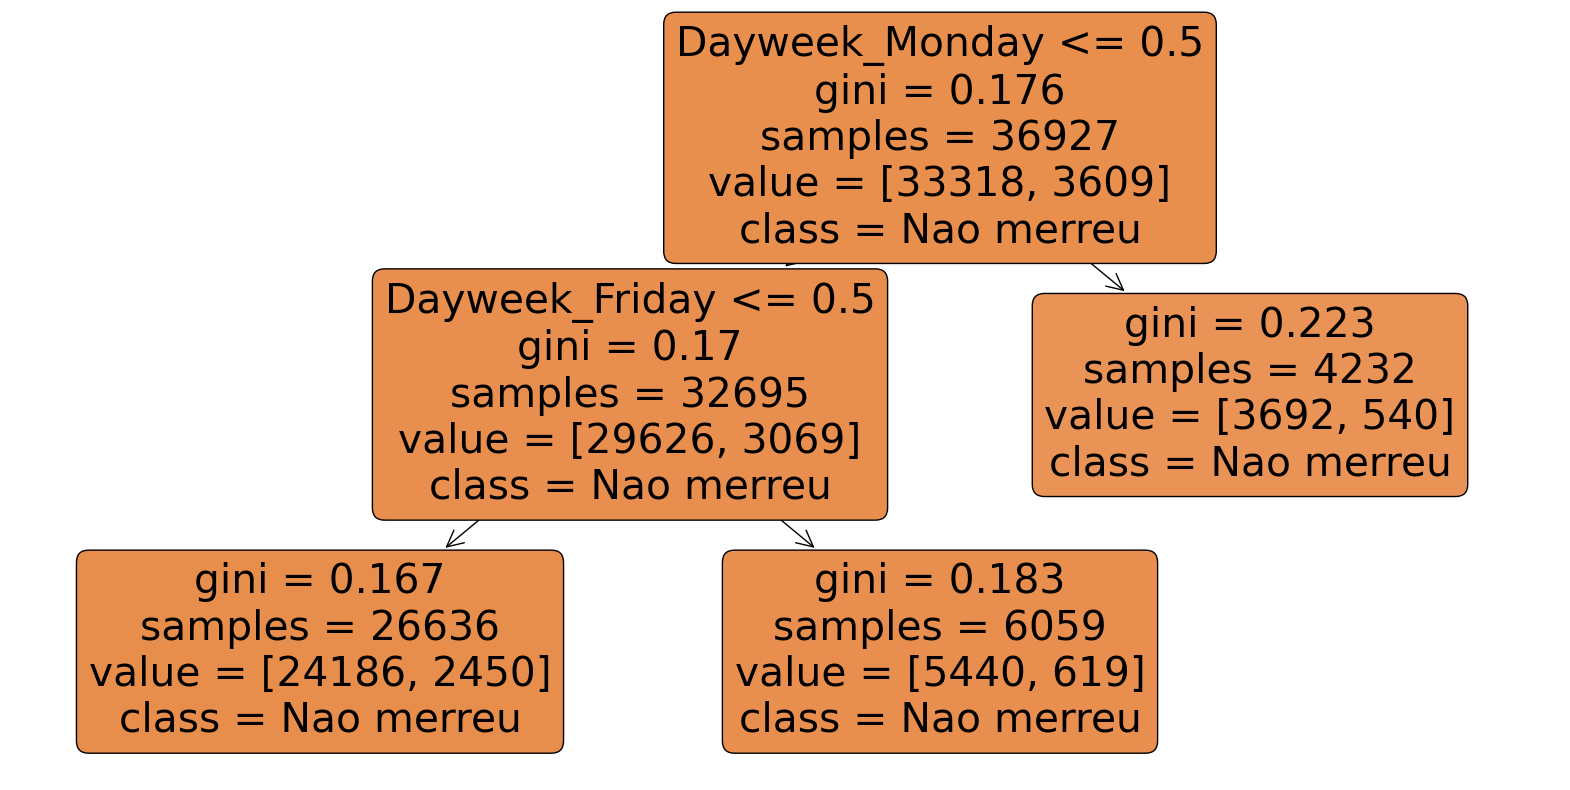

In [66]:
x = df2.iloc[:,:2]
y = df2.iloc[:,-1]  

print(x)

# Dividir o dataset em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Inicializar o modelo de Árvore de Decisão
clf = tree.DecisionTreeClassifier()

# Treinar o modelo
clf.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Visualizar a árvore de decisão
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=x.columns, class_names=['Nao merreu', 'Merreu'], rounded=True)
#plt.show()